In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Support Vector Machines/SalaryData_Train(1).csv")
test=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Support Vector Machines/SalaryData_Test(1).csv")


In [3]:
df=test.append(train)

In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
str_c=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [7]:
number=LabelEncoder()

In [8]:
for i in str_c:
    train[i]=number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [9]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [10]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [11]:
mapping={' >50k':1,'<=50k':2}

In [12]:
train=train.replace({'Salary':mapping})
test=test.replace({'Salary':mapping})

In [13]:
df=train.append(test)

In [14]:
df=df.reset_index()

In [15]:
df.head()

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [16]:
df.shape

(45221, 15)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,45221.0,12565.448575,8337.871072,0.0,5652.0,11305.0,18855.0,30160.0
age,45221.0,38.548086,13.217981,17.0,28.0,37.0,47.0,90.0
workclass,45221.0,2.204507,0.958132,0.0,2.0,2.0,2.0,6.0
education,45221.0,10.313217,3.816992,0.0,9.0,11.0,12.0,15.0
educationno,45221.0,10.118463,2.552909,1.0,9.0,10.0,13.0,16.0
maritalstatus,45221.0,2.585148,1.500460,0.0,2.0,2.0,4.0,6.0
occupation,45221.0,5.969572,4.026444,0.0,2.0,6.0,9.0,13.0
relationship,45221.0,1.412684,1.597242,0.0,0.0,1.0,3.0,5.0
race,45221.0,3.680281,0.832361,0.0,4.0,4.0,4.0,4.0
sex,45221.0,0.675062,0.468357,0.0,0.0,1.0,1.0,1.0


# **Lets find the correlation in data**

In [18]:
corr=df.corr()

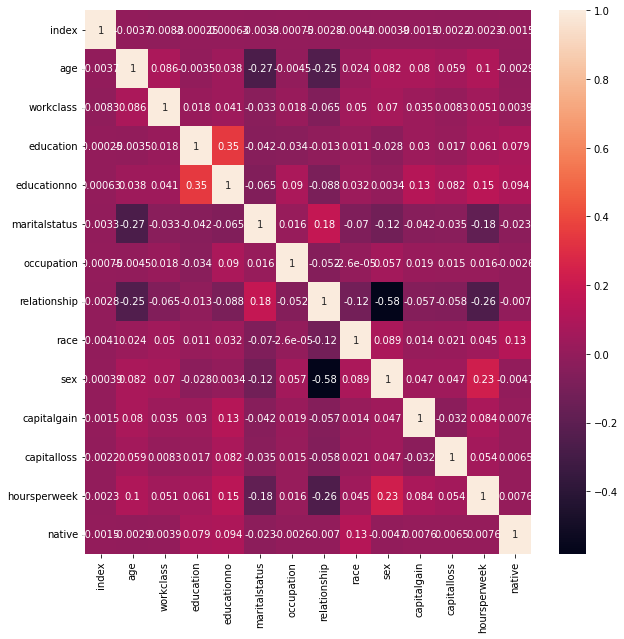

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [20]:
plt.rcParams["figure.figsize"]=9,5


Skew: -0.31062061074424
Kurtosis: 0.6350448194491634


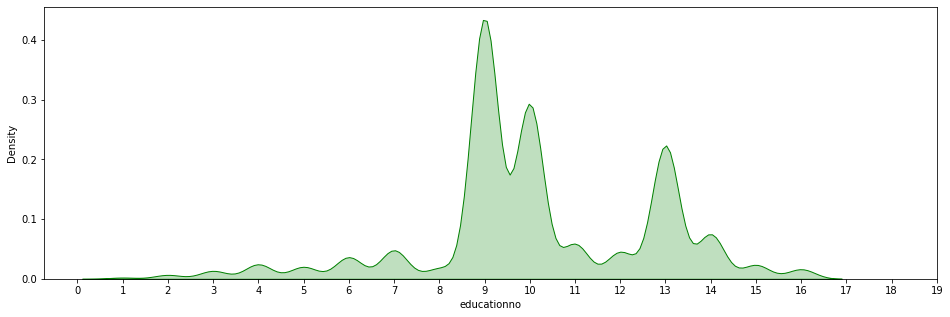

In [21]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['educationno'].skew()))
print("Kurtosis: {}".format(df['educationno'].kurtosis()))
ax = sns.kdeplot(df['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

## The Data is right skewed and have low kurtosis value.

## Most of people have education number of 9-10 years. 

In [22]:
dfa=df[df.columns[:13]]
obj_column=dfa.select_dtypes(include='object').columns.tolist()

In [23]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

In [24]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df_temp[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

<Figure size 1152x720 with 0 Axes>

In [25]:
num_columns=dfa.select_dtypes(exclude='object').columns.tolist()

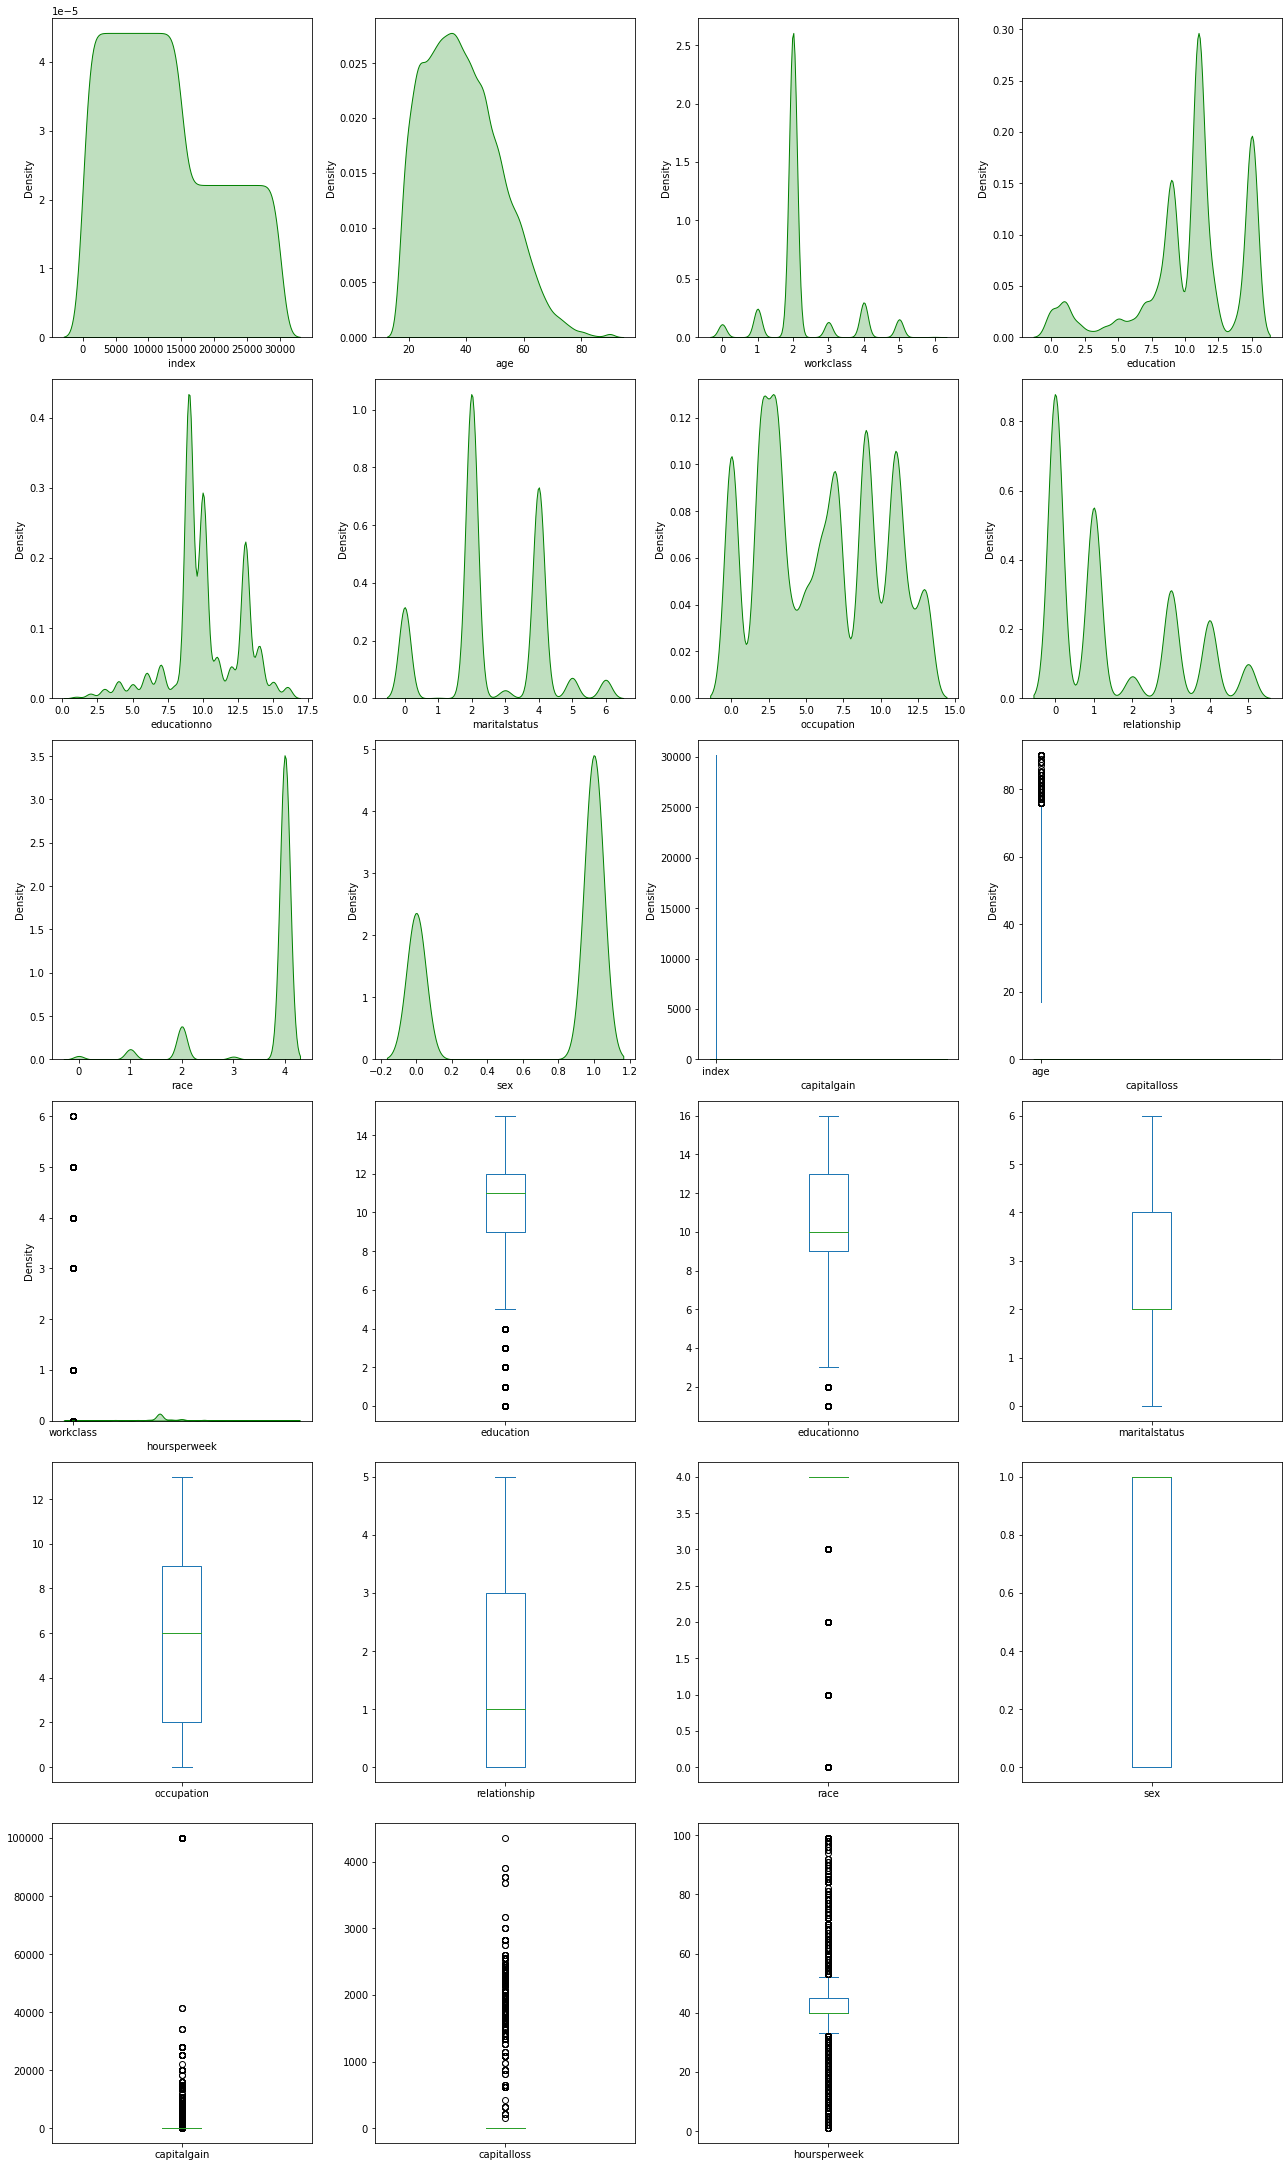

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
skewness,0.438900,0.532784,1.148931,-0.945666,-0.310621,-0.006760,0.107141,0.829192,-2.518388,-0.747594,11.788871,4.517536,0.340536
kurtosis,-0.883161,-0.155931,2.329983,0.773506,0.635045,-0.538981,-1.249883,-0.697095,5.350390,-1.441168,150.147899,19.376085,3.201287


In [26]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data=df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# **SVM**

In [30]:
df

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
45217,15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
45218,15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
45219,15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [27]:
col=df.columns


In [28]:
col

Index(['index', 'age', 'workclass', 'education', 'educationno',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [33]:
x_train=train[col[1:13]]
y_train=train[col[13]]
x_test=test[col[1:13]]
y_test=test[col[13]]

In [36]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [37]:
x_train = norm_func(x_train)
x_test = norm_func(x_test)

# **Linear**

In [39]:
model_linear=SVC(kernel='linear')
model_linear.fit(x_train,y_train)
pred_test_linear=model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_linear))

Accuracy: 0.9155378486055777


# **Poly**

In [40]:
model_poly=SVC(kernel='poly')
model_poly.fit(x_train,y_train)
pred_test_poly=model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_poly))

Accuracy: 0.9162682602921647


# **RBF**

In [41]:
model_rbf=SVC(kernel='rbf')
model_rbf.fit(x_train,y_train)
pred_test_rbf=model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_rbf))

Accuracy: 0.9158034528552457


# **Sigmoid**

In [42]:
model_sigmoid=SVC(kernel='sigmoid')
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid=model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred_test_sigmoid))

Accuracy: 0.9103585657370518


# **`Conclusion`**

**Poly model is most accurate**